In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
class Model(object):
    def __init__(self):
        self.w = tf.Variable(2, dtype=tf.float32)
        self.b = tf.Variable(1, dtype=tf.float32)
    def __call__(self, x):
        return (self.w*x+self.b)

In [3]:
def loss(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true-y_pred))

In [4]:
w_true = 3.0
b_true = 2.0
x = tf.random.normal(shape=[1000])
y = w_true*x+b_true

In [5]:
def visualize_data(inputs, outputs, predicted):
    true_outputs = plt.scatter(inputs,  outputs, c='b')
    pred_outputs = plt.scatter(inputs, predicted, c='r')
    plt.legend((true_outputs, pred_outputs), ('true values','predicted'))
    plt.show()

In [6]:
model = Model()

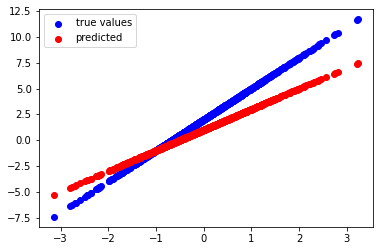

In [7]:
visualize_data(x, y, model(x))

In [8]:
def train(model, inputs, outputs, learning_rate=0.001):
    with tf.GradientTape() as tape:
        current_loss = loss(outputs, model(inputs))
    dw, db = tape.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate*dw)
    model.b.assign_sub(learning_rate*db)
    return current_loss
    

In [9]:
model = Model()
list_w, list_b = [], []

losses = []
for epoch in range(15):
    current_loss = train(model, x, y, 0.1)
    losses.append(current_loss.numpy())
    list_w.append(model.w.numpy())
    list_b.append(model.b.numpy())
    print(epoch, list_w[-1], list_b[-1], losses[-1])
    

0 2.2028353 1.2007926 2.0181394
1 2.36453 1.3612659 1.2857443
2 2.4934285 1.4895164 0.819145
3 2.596182 1.5920146 0.5218789
4 2.678094 1.6739317 0.3324924
5 2.743391 1.7394005 0.21183436
6 2.7954435 1.7917237 0.13496286
7 2.8369377 1.8335412 0.0859874
8 2.8700151 1.8669622 0.054784585
9 2.896383 1.8936728 0.03490476
10 2.9174023 1.9150203 0.022238921
11 2.9341578 1.9320817 0.014169239
12 2.9475145 1.9457176 0.009027807
13 2.9581618 1.9566157 0.0057520214
14 2.9666493 1.9653257 0.0036648961


## Evaluation

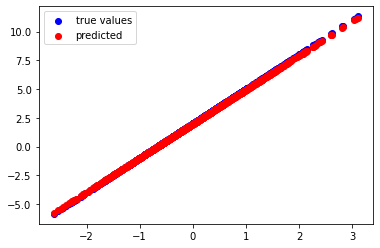

In [11]:
test_inputs = tf.random.normal(shape=[1000])
test_outputs = w_true*test_inputs + b_true
test_predictions = model(test_inputs)
visualize_data(test_inputs, test_outputs, test_predictions)

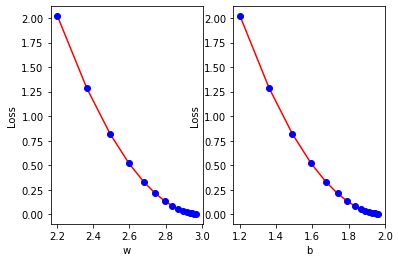

In [12]:
def plot_loss_for_weights(weights_list, losses):
    for idx, weights in enumerate(weights_list):
        plt.subplot(120 + idx + 1)
        plt.plot(weights['values'], losses, 'r')
        plt.plot(weights['values'], losses, 'bo')
        plt.xlabel(weights['name'])
        plt.ylabel('Loss')
    
    
weights_list = [{ 'name' : "w",
                  'values' : list_w
                },
                {
                  'name' : "b",
                  'values' : list_b
                }]

plot_loss_for_weights(weights_list, losses)